In [1]:
import pandas as pd
import numpy as np
import bilby
import pickle

import matplotlib.pyplot as plt

In [2]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')

mpl.rc('xtick', labelsize = 16) 
mpl.rc('ytick', labelsize = 16)

In [135]:
my_color = '#2f4f4f'
my_color2 = '#f8c997'
my_color2_darker = '#f6b26b'

In [107]:
# nested dictionary of paper names, values and errors
data = {
    "Planck": {
        "value": 67.27,
        "error_minus": 0.60,
        "error_plus": 0.60
    },
    "Planck+lensing": {
        "value": 67.36,
        "error_minus": 0.54,
        "error_plus": 0.54
    },
    "BAO+Pantheon+BBN+$\\theta_{MC, Planck}$": {
        "value": 67.9,
        "error_minus": 0.8,
        "error_plus": 0.8
    },
    "DES+BAO+BBN": {
        "value": 67.2,
        "error_minus": 1.2,
        "error_plus": 1.0
    },
    "ACT": {
        "value": 67.9,
        "error_minus": 1.5,
        "error_plus": 1.5
    },
    "WMAP9+BAO": {
        "value": 68.2,
        "error_minus": 0.7,
        "error_plus": 0.7
    },
    "SPT-SZ+BAO": {
        "value": 68.3,
        "error_minus": 0.9,
        "error_plus": 0.9
    },
    "FS+BAO+BBN": {
        "value": 68.6,
        "error_minus": 1.1,
        "error_plus": 1.1
    },
    "Cepheids-SNIa": {
        "Riess et al. 2020": {
            "value": 73.2,
            "error_minus": 1.3,
            "error_plus": 1.3
        },
        "Breuval et al. 2020": {
            "value": 73.0,
            "error_minus": 2.7,
            "error_plus": 2.7
        },
        "Riess et al. 2019": {
            "value": 74.03,
            "error_minus": 1.42,
            "error_plus": 1.42
        },
        "Burns et al. 2018": {
            "value": 73.2,
            "error_minus": 2.3,
            "error_plus": 2.3
        },
        "Freedman et al. 2012": {
            "value": 74.3,
            "error_minus": 2.1,
            "error_plus": 2.1
        }
    },
    "TRGB-SNIa": {
        "Soltis et al. 2020": {
            "value": 72.1,
            "error_minus": 2.0,
            "error_plus": 2.0
        },
        "Freedman et al. 2020": {
            "value": 69.6,
            "error_minus": 1.88,
            "error_plus": 1.88
        },
        "Yuan et al. 2019": {
            "value": 72.4,
            "error_minus": 2.0,
            "error_plus": 2.0
        },
        "Jang and Lee 2017": {
            "value": 71.17,
            "error_minus": 2.5,
            "error_plus": 2.5
        },
        "Reid, Pesce, Riess 2019": {
            "value": 71.1,
            "error_minus": 1.9,
            "error_plus": 1.9
        }
    },
    "Miras-SNIa": {
        "Huang et al. 2019": {
            "value": 73.3,
            "error_minus": 4.0,
            "error_plus": 4.0
        }
    },
    "Masers": {
        "Pesce et al. 2019": {
            "value": 73.9,
            "error_minus": 3.0,
            "error_plus": 3.0
        }
    },
    "Tully Fisher": {
        "Kourkchi et al. 2020": {
            "value": 76.0,
            "error_minus": 2.55,
            "error_plus": 2.55
        },
        "Schombert et al. 2020": {
            "value": 75.1,
            "error_minus": 2.75,
            "error_plus": 2.75
        }
    },
    "Surface Brightness Fluctuations": {
        "Blakeslee et al. 2021": {
            "value": 73.3,
            "error_minus": 2.5,
            "error_plus": 2.5
        },
        "Khetan et al. 2020": {
            "value": 70.5,
            "error_minus": 4.1,
            "error_plus": 4.1
        }
    },
    "SN II": {
        "de Jaeger et al. 2020": {
            "value": 75.8,
            "error_minus": 4.9,
            "error_plus": 5.2
        }
    },
    "Time-delay Lensing": {
        "Wong et al. 2019": {
            "value": 73.3,
            "error_minus": 1.8,
            "error_plus": 1.7
        },
        "Shajib et al. 2020": {
            "value": 74.2,
            "error_minus": 3.0,
            "error_plus": 2.7
        },
        "Birrer et al. 2020a": {
            "value": 74.5,
            "error_minus": 6.1,
            "error_plus": 5.6
        },
        "Birrer et al. 2020b": {
            "value": 67.4,
            "error_minus": 3.2,
            "error_plus": 4.2
        }
    },
    "Standard Sirens": {
        "Abbott et al. 2017": {
            "value": 70.0,
            "error_minus": 8.0,
            "error_plus": 12.0
        }
    },
    "$\gamma$-ray Attenuation": {
        "Dominguez et al. 2019": {
            "value": 67.4,
            "error_minus": 6.2,
            "error_plus": 6.0
        }
    }
}   

In [108]:
indirect_keys = ['Planck', 'Planck+lensing', 'BAO+Pantheon+BBN+$\\theta_{MC, Planck}$', 'DES+BAO+BBN', 'ACT', 'WMAP9+BAO', 'SPT-SZ+BAO', 'FS+BAO+BBN']
direct_keys = ['Cepheids-SNIa', 'TRGB-SNIa', 'Miras-SNIa', 'Masers', 'Tully Fisher', 'Surface Brightness Fluctuations', 'SN II', 'Time-delay Lensing', 'Standard Sirens', '$\gamma$-ray Attenuation']

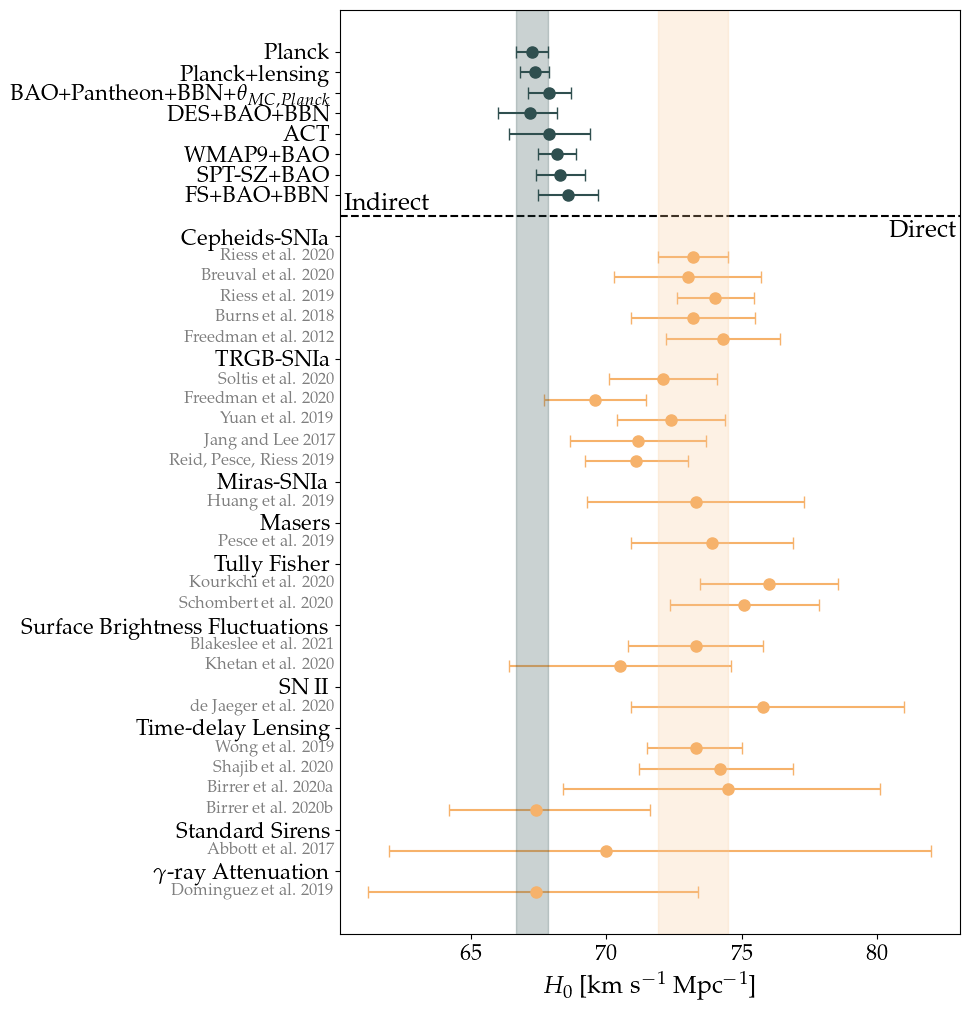

In [136]:
# plot the data
fig, ax = plt.subplots(figsize=(8, 12))

tot_num = len(indirect_keys) + len(direct_keys)

# set the ticks
# for each indirect key consider extra separation between groups, then consider space for each paper in each group
# consider space for the dashed line

ypos_all_ticks = np.arange(1, len(indirect_keys) + len(direct_keys) + 23 + 2)
ypos_major_ticks = [42,41,40,39,38,37,36,35, # indirect keys
                    33, # 5 papers
                    27, # 5 papers
                    21, # 1 paper
                    19, # 1 paper
                    17, # 2 papers
                    14, # 2 papers
                    11, # 1 paper
                    9, # 4 papers
                    4, # 1 paper
                    2] # 1 paper
ypos_minor_ticks = [32,31,30,29,28,26,25,24,23,22,20,18,16,15,13,12,10,8,7,6,5,3,1]

# plot the data
count = len(ypos_all_ticks) 
for i, item in enumerate(indirect_keys):
    count -= 1
    ax.errorbar(data[item]["value"], ypos_all_ticks[count], xerr=[[data[item]["error_minus"]], [data[item]["error_plus"]]], fmt='o', color=my_color, 
                capsize=4, markersize=8, label=item, zorder=1)

plt.axhline(y=count, color='black', linestyle='--', zorder=0)
count -= 2

papers = []
for i, item in enumerate(direct_keys):
    count -= 1
    for j, key in enumerate(data[item]):
        ax.errorbar(data[item][key]["value"], ypos_all_ticks[count], xerr=[[data[item][key]["error_minus"]], [data[item][key]["error_plus"]]], 
                    fmt='o', color=my_color2_darker, capsize=4, markersize=8, label=key, zorder=1)
        papers.append(key)
        count -= 1
    
# put name of paper on y axis instead of tickparams
# reverse the order of the keys to have the first one on top
y_main_keys = indirect_keys + direct_keys 
y_paper_keys = papers

ax.set_yticks(ypos_major_ticks)
ax.set_yticklabels(y_main_keys, fontsize=16, weight='bold') 

# manually set the minor ticks
for i, label in enumerate(y_paper_keys):
    plt.text(60, ypos_minor_ticks[i], label, ha='right', va='center', fontsize=12, color='gray')

plt.text(63.5, 34.5, 'Indirect', ha='right', va='center', fontsize=18, color='black')
plt.text(80.45, 33.2, 'Direct', ha='left', va='center', fontsize=18, color='black')

# Highlight regions
ax.axvspan(67.27-0.60, 67.27+0.60, color=my_color, alpha=0.25)
ax.axvspan(73.2-1.3, 73.2+1.3, color=my_color2, alpha=0.25)

plt.xlabel('$H_0$ [km s$^{-1}$ Mpc$^{-1}$]', fontsize=18)

plt.savefig('plots/H0_values.pdf', bbox_inches='tight')
plt.show()